In [2]:
from pyspark import SparkContext
sc=SparkContext("local","PySparkIntro")

23/10/10 10:25:40 WARN Utils: Your hostname, DESKTOP-VJJUB30 resolves to a loopback address: 127.0.1.1; using 172.18.203.93 instead (on interface eth0)
23/10/10 10:25:40 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/10 10:25:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("PySparkIntro").config("spark.some.config.option","some-value").getOrCreate()

In [4]:
data=[1,2,3,4,5]
rdd=sc.parallelize(data)

In [6]:
squared_rdd=rdd.map(lambda x:x**2)
even_rdd=rdd.filter(lambda x: x%2==0)

In [7]:
collected_data=squared_rdd.collect()
collected_data

[1, 4, 9, 16, 25]

In [8]:
num_elemenet=squared_rdd.count()
num_elemenet

5

In [9]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType


In [10]:
schema=StructType([
    StructField("Name",StringType(),True),
    StructField("Age",IntegerType(),True),
    StructField("Salary",IntegerType(),True)
])

In [11]:
data=[("Hassan",26,25000),("Hossein",35,125000),("Akbar",42,69000)]
ds=spark.createDataFrame(data,schema)
ds=ds.alias("employees")
ds.show()

+-------+---+------+
|   Name|Age|Salary|
+-------+---+------+
| Hassan| 26| 25000|
|Hossein| 35|125000|
|  Akbar| 42| 69000|
+-------+---+------+



In [18]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("DiamondsAnalysis").getOrCreate()

# Read data from CSV file into a DataFrame
df = spark.read.load('diamonds.csv', format='csv', header=True, inferSchema=True)

# Display the first 10 rows of the DataFrame
df.limit(10).show()

23/10/16 14:54:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|
| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|
| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|
| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|
| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+



In [13]:
spark.stop()

In [23]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("DiamondsAnalysis1").getOrCreate()

schema = StructType([
    StructField("carat", FloatType(), True),
    StructField("cut", StringType(), True),
    StructField("color", StringType(), True),
    StructField("clarity", StringType(), True),
    StructField("depth", FloatType(), True),
    StructField("table", FloatType(), True),
    StructField("price", IntegerType(), True),
    StructField("x", FloatType(), True),
    StructField("y", FloatType(), True),
    StructField("z", FloatType(), True)
])

df = spark.read.load('diamonds.csv',
    format='csv',
    schema=schema,
    header=True)
df.limit(10).show()



+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|
| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|
| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|
| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|
| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+



In [25]:
pricelist_df = df.select("clarity", "table")
pricelist_df.limit(10).show()

+-------+-----+
|clarity|table|
+-------+-----+
|    SI2| 55.0|
|    SI1| 61.0|
|    VS1| 65.0|
|    VS2| 58.0|
|    SI2| 58.0|
|   VVS2| 57.0|
|   VVS1| 57.0|
|    SI1| 55.0|
|    VS2| 61.0|
|    VS1| 61.0|
+-------+-----+



In [26]:
bikes_df = df.select("carat", "price").where((df["color"]=="E") | (df["clarity"]=="SI2"))
bikes_df.show()

+-----+-----+
|carat|price|
+-----+-----+
| 0.23|  326|
| 0.21|  326|
| 0.23|  327|
| 0.31|  335|
| 0.22|  337|
| 0.31|  344|
|  0.2|  345|
| 0.32|  345|
|  0.3|  348|
|  0.3|  351|
| 0.23|  352|
| 0.23|  402|
| 0.23|  402|
| 0.23|  402|
| 0.33|  403|
| 0.33|  403|
| 0.32|  403|
| 0.32|  403|
| 0.32|  403|
| 0.25|  404|
+-----+-----+
only showing top 20 rows



In [27]:
(df
 .select("carat", "price")
 .groupBy(["carat", "price"])
 .count()
 .show()
)


+-----+-----+-----+
|carat|price|count|
+-----+-----+-----+
| 0.81| 2795|    3|
|  0.9| 2871|    1|
| 0.92| 2880|    1|
| 1.05| 2911|    1|
| 0.83| 3198|    2|
| 0.75| 3206|    3|
| 1.01| 3297|    1|
| 0.73| 3615|    1|
| 0.91| 3659|    1|
| 0.91| 3776|    2|
| 0.53| 3827|    1|
| 1.26| 3881|    1|
| 0.91| 4033|    1|
| 1.01| 4079|    2|
| 1.05| 4126|    1|
| 0.82| 4130|    1|
|  0.9| 4144|    1|
| 0.81| 4284|    1|
| 0.85| 4293|    1|
| 1.13| 4406|    1|
+-----+-----+-----+
only showing top 20 rows



In [28]:
df.createOrReplaceTempView("Diamonds")

In [30]:
bikes_df = spark.sql("SELECT carat,price,color \
                      FROM Diamonds \
                      WHERE color='E'")
bikes_df.show()

+-----+-----+-----+
|carat|price|color|
+-----+-----+-----+
| 0.23|  326|    E|
| 0.21|  326|    E|
| 0.23|  327|    E|
| 0.22|  337|    E|
|  0.2|  345|    E|
| 0.32|  345|    E|
| 0.23|  352|    E|
| 0.23|  402|    E|
| 0.23|  402|    E|
| 0.23|  402|    E|
| 0.25|  404|    E|
| 0.22|  404|    E|
| 0.24|  553|    E|
| 0.26|  554|    E|
| 0.26|  554|    E|
| 0.26|  554|    E|
| 0.26|  554|    E|
| 0.26|  554|    E|
|  0.7| 2757|    E|
| 0.86| 2757|    E|
+-----+-----+-----+
only showing top 20 rows



In [41]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 KB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.5 MB/s eta 0:00:0000:0100:01


In [48]:
type(price_range_by_color

DataFrame[color: string, min_price: int, max_price: int]

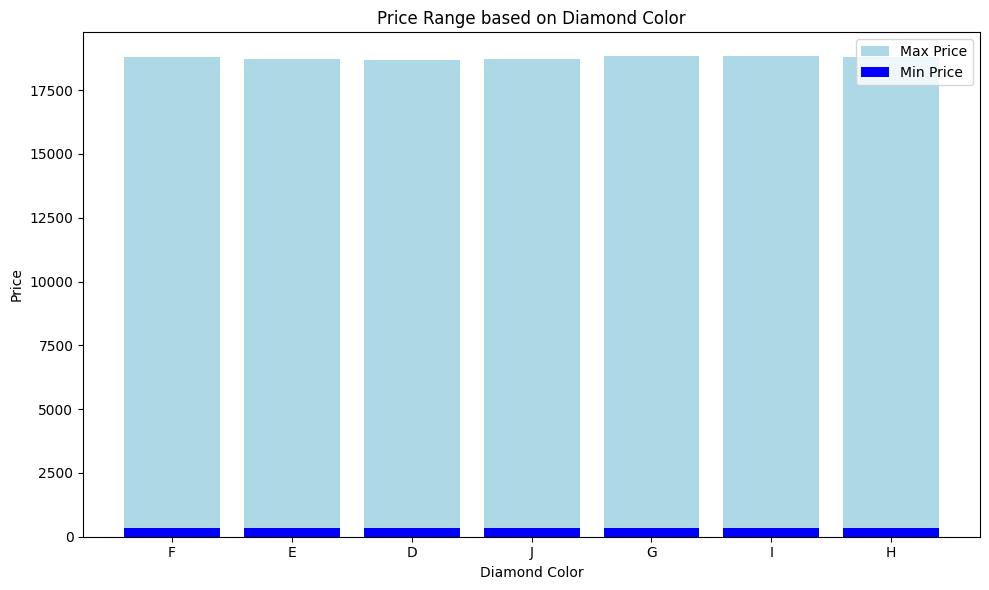

In [49]:
from pyspark.sql.functions import mean, max, percentile_approx,min
import matplotlib.pyplot as plt
price_range_by_color = df.groupBy("color").agg(
    min("price").alias("min_price"),
    max("price").alias("max_price")
)

price_range_pd = price_range_by_color.toPandas()
# Display the results
plt.figure(figsize=(10, 6))
plt.bar(price_range_pd['color'], price_range_pd['max_price'], label='Max Price', color='lightblue')
plt.bar(price_range_pd['color'], price_range_pd['min_price'], label='Min Price', color='blue')

plt.xlabel('Diamond Color')
plt.ylabel('Price')
plt.title('Price Range based on Diamond Color')
plt.legend()
plt.tight_layout()
plt.show()

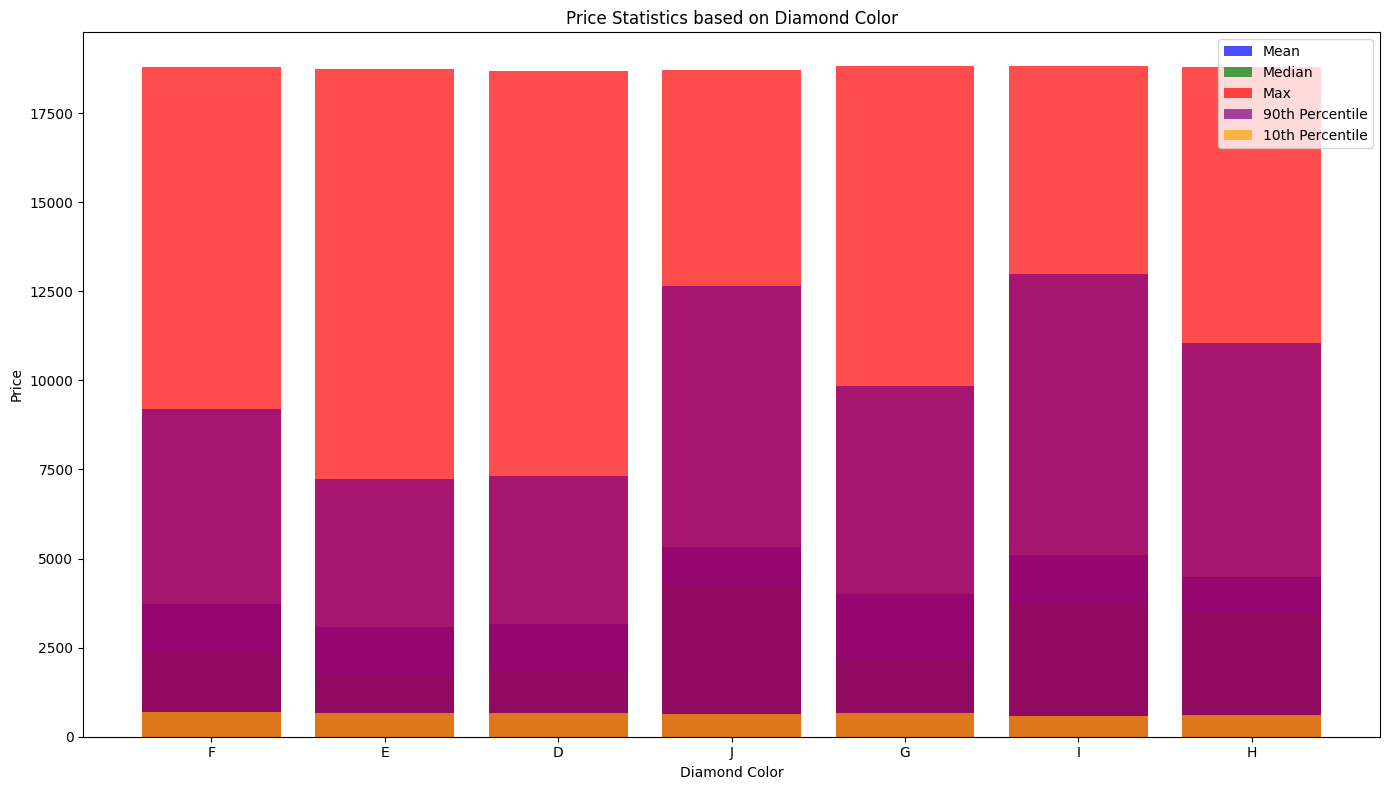

In [50]:
stats_by_color = df.groupBy("color").agg(
    mean("price").alias("mean_price"),
    percentile_approx("price", 0.5).alias("median_price"),  # 50th percentile
    max("price").alias("max_price"),
    percentile_approx("price", 0.9).alias("90_percentile"),  # 90th percentile
    percentile_approx("price", 0.1).alias("10_percentile")   # 10th percentile
)


stats_pd = stats_by_color.toPandas()

# Plotting the statistics
plt.figure(figsize=(14, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = ['Mean', 'Median', 'Max', '90th Percentile', '10th Percentile']

for i, col in enumerate(['mean_price', 'median_price', 'max_price', '90_percentile', '10_percentile']):
    plt.bar(stats_pd['color'], stats_pd[col], label=labels[i], color=colors[i], alpha=0.7)

plt.xlabel('Diamond Color')
plt.ylabel('Price')
plt.title('Price Statistics based on Diamond Color')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import pyplot as plt

# Get the data as a Pandas dataframe
data = spark.sql("SELECT Category, COUNT(ProductID) AS ProductCount \
                  FROM products \
                  GROUP BY Category \
                  ORDER BY Category").toPandas()

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(12,8))

# Create a bar plot of product counts by category
plt.bar(x=data['Category'], height=data['ProductCount'], color='orange')

# Customize the chart
plt.title('Product Counts by Category')
plt.xlabel('Category')
plt.ylabel('Products')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=70)

# Show the plot area
plt.show()

In [51]:
!git clone https://github.com/MicrosoftLearning/DP-500-Azure-Data-Analyst dp500

Cloning into 'dp500'...
remote: Enumerating objects: 1697, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1697 (delta 227), reused 216 (delta 210), pack-reused 1451
Receiving objects: 100% (1697/1697), 113.10 MiB | 2.41 MiB/s, done.
Resolving deltas: 100% (581/581), done.
Updating files: 100% (928/928), done.


In [54]:
orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
     ])
df = spark.read.load('dp500/Allfiles/01/data/2019.csv', format='csv', header=False, schema=orderSchema)
df.limit(100).show()

+----------------+--------------------+----------+-----------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|     CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+-----------------+--------------------+--------------------+--------+---------+--------+
|         SO43701|                   1|2019-07-01|      Christy Zhu|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43704|                   1|2019-07-01|       Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99|269.9992|
|         SO43705|                   1|2019-07-01|        Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43700|                   1|2019-07-01|     Ruben Prasad|ruben10@adventure...|  Road-650 Black, 62|       1| 699.0982| 55.9279|
|         SO43703|         

In [55]:
 df.printSchema()

root
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- Tax: float (nullable = true)



In [62]:
df.show()

+----------------+--------------------+----------+-----------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|     CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+-----------------+--------------------+--------------------+--------+---------+--------+
|         SO43701|                   1|2019-07-01|      Christy Zhu|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43704|                   1|2019-07-01|       Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99|269.9992|
|         SO43705|                   1|2019-07-01|        Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43700|                   1|2019-07-01|     Ruben Prasad|ruben10@adventure...|  Road-650 Black, 62|       1| 699.0982| 55.9279|
|         SO43703|         

In [69]:
A=df.select(['Item'])
A.distinct().show()

+--------------------+
|                Item|
+--------------------+
|Mountain-100 Silv...|
|Mountain-100 Silv...|
|Mountain-100 Silv...|
|    Road-650 Red, 52|
|Mountain-100 Blac...|
|Mountain-100 Blac...|
|  Road-650 Black, 60|
|    Road-150 Red, 62|
|    Road-650 Red, 48|
|  Road-650 Black, 44|
|    Road-150 Red, 44|
|    Road-650 Red, 58|
|  Road-650 Black, 62|
|    Road-650 Red, 60|
|    Road-650 Red, 62|
|  Road-650 Black, 48|
|  Road-650 Black, 52|
|Mountain-100 Blac...|
|    Road-150 Red, 48|
|    Road-150 Red, 52|
+--------------------+
only showing top 20 rows



In [56]:
 customers = df['CustomerName', 'Email']
 print(customers.count())
 print(customers.distinct().count())
 customers.distinct().show()

1201
1201
+------------------+--------------------+
|      CustomerName|               Email|
+------------------+--------------------+
|Jonathon Gutierrez|jonathon8@adventu...|
|      Blake Butler|blake62@adventure...|
|     Melissa Perry|melissa2@adventur...|
|      Hailey James|hailey17@adventur...|
|      Jasmine West|jasmine37@adventu...|
|       Teresa Ruiz|teresa3@adventure...|
|       Kenneth Lal|kenneth8@adventur...|
|     Eduardo Perez|eduardo36@adventu...|
|     James Simmons|james31@adventure...|
|       Darren Rana|darren14@adventur...|
|        Lisa Zheng|lisa22@adventure-...|
|        Randy Zeng|randy24@adventure...|
|     Bruce Navarro|bruce31@adventure...|
|  Micheal Saunders|micheal16@adventu...|
|      Aaron Flores|aaron11@adventure...|
|     Natalie Moore|natalie75@adventu...|
|      Kelvin Huang|kelvin25@adventur...|
|          Levi Sai|levi5@adventure-w...|
|      Michele Nath|michele19@adventu...|
|     Nicole Howard|nicole38@adventur...|
+------------------+----

In [70]:
 customers = df.select("CustomerName", "Email").where(df['Item']=='Road-650 Red, 52')
 print(customers.count())
 print(customers.distinct().count())
customers.distinct().show()

10
10
+-------------------+--------------------+
|       CustomerName|               Email|
+-------------------+--------------------+
|       Aaron Flores|aaron11@adventure...|
|          Brad Deng|brad2@adventure-w...|
|  Ashley Washington|ashley40@adventur...|
|Elizabeth Henderson|elizabeth34@adven...|
|        Joan Martin|joan19@adventure-...|
|       Dennis Zheng|dennis21@adventur...|
|         Christy Wu|christy6@adventur...|
|         Amber Hill|amber13@adventure...|
|           Cara Sun|cara9@adventure-w...|
|        Nicolas Rai|nicolas16@adventu...|
+-------------------+--------------------+



In [72]:
productSales = df.select("Item", "Quantity").groupBy("Item").sum()
productSales.show()

+--------------------+-------------+
|                Item|sum(Quantity)|
+--------------------+-------------+
|Mountain-100 Silv...|           21|
|Mountain-100 Silv...|           28|
|Mountain-100 Silv...|           39|
|    Road-650 Red, 52|           10|
|Mountain-100 Blac...|           35|
|Mountain-100 Blac...|           23|
|  Road-650 Black, 60|           15|
|    Road-150 Red, 62|          197|
|    Road-650 Red, 48|           13|
|  Road-650 Black, 44|           14|
|    Road-150 Red, 44|          157|
|    Road-650 Red, 58|            9|
|  Road-650 Black, 62|           15|
|    Road-650 Red, 60|           13|
|    Road-650 Red, 62|            4|
|  Road-650 Black, 48|            4|
|  Road-650 Black, 52|           20|
|Mountain-100 Blac...|           24|
|    Road-150 Red, 48|          179|
|    Road-150 Red, 52|          155|
+--------------------+-------------+
only showing top 20 rows



In [73]:
(df
 .select(year("OrderDate")
 .alias("Year"))
 .groupBy("Year")
 .count()
 .orderBy("Year")
 .show()
)

+----+-----+
|Year|count|
+----+-----+
|2019| 1201|
+----+-----+



In [75]:
 df.createOrReplaceTempView("salesorders")

(spark
 .sql("SELECT * FROM salesorders")
 .show()
)

+----------------+--------------------+----------+-----------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|     CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+-----------------+--------------------+--------------------+--------+---------+--------+
|         SO43701|                   1|2019-07-01|      Christy Zhu|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43704|                   1|2019-07-01|       Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99|269.9992|
|         SO43705|                   1|2019-07-01|        Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43700|                   1|2019-07-01|     Ruben Prasad|ruben10@adventure...|  Road-650 Black, 62|       1| 699.0982| 55.9279|
|         SO43703|         

In [76]:
 sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                 SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
             FROM salesorders \
             GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
             ORDER BY OrderYear"
(spark
 .sql(sqlQuery)
 .show()
)

23/10/16 17:33:14 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier
23/10/16 17:33:14 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier


+---------+-----------------+
|OrderYear|     GrossRevenue|
+---------+-----------------+
|     2019|4172169.969970703|
+---------+-----------------+



23/10/16 17:35:49 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier
23/10/16 17:35:49 WARN CharVarcharUtils: The Spark cast operator does not support char/varchar type and simply treats them as string type. Please use string type directly to avoid confusion. Otherwise, you can set spark.sql.legacy.charVarcharAsString to true, so that Spark treat them as string type as same as Spark 3.0 and earlier


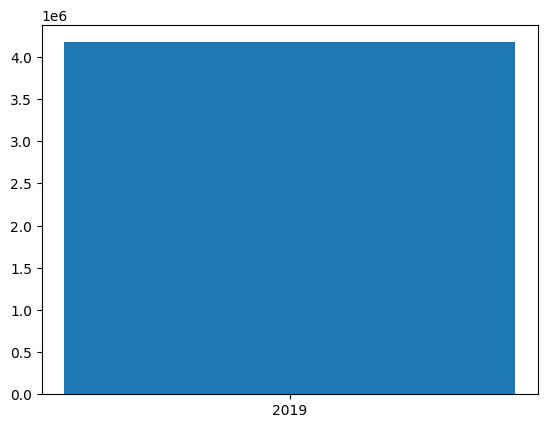

In [80]:
from matplotlib import pyplot as plt

df_sales =spark.sql(sqlQuery).toPandas()


plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])


plt.show()

In [89]:
df=spark.read.parquet('dp500/Allfiles/01/data/2019.snappy.parquet')
(df
.limit(10)
.show()
)

+----------------+------------------+----------+----------------+--------------------+--------------------+--------+---------+---------+
|SalesOrderNumber|SalesOrderLineItem| OrderDate|    CustomerName|        EmailAddress|                Item|Quantity|UnitPrice|TaxAmount|
+----------------+------------------+----------+----------------+--------------------+--------------------+--------+---------+---------+
|         SO43701|                 1|2019-07-01|     Christy Zhu|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99| 271.9992|
|         SO43704|                 1|2019-07-01|      Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99| 269.9992|
|         SO43705|                 1|2019-07-01|       Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99| 271.9992|
|         SO43700|                 1|2019-07-01|    Ruben Prasad|ruben10@adventure...|  Road-650 Black, 62|       1| 699.0982|  55.9279|
|         SO43703|                 1|2019

In [86]:
from pyspark.sql.functions import split, col

# Create the new FirstName and LastName fields
df=df.withColumn("FirstName",split(col("CustomerName"), " ").getItem(0))
df=df.withColumn("Lastname",split(col("CustomerName"), " ").getItem(1))

# Remove the CustomerName field
df = df.drop("CustomerName")

df.limit(5).show()

+----------------+------------------+----------+--------------------+--------------------+--------+---------+---------+---------+--------+
|SalesOrderNumber|SalesOrderLineItem| OrderDate|        EmailAddress|                Item|Quantity|UnitPrice|TaxAmount|FirstName|Lastname|
+----------------+------------------+----------+--------------------+--------------------+--------+---------+---------+---------+--------+
|         SO43701|                 1|2019-07-01|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99| 271.9992|  Christy|     Zhu|
|         SO43704|                 1|2019-07-01|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99| 269.9992|    Julio|    Ruiz|
|         SO43705|                 1|2019-07-01|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99| 271.9992|   Curtis|      Lu|
|         SO43700|                 1|2019-07-01|ruben10@adventure...|  Road-650 Black, 62|       1| 699.0982|  55.9279|    Ruben|  Prasad|
|         SO43703|         

In [88]:
df.write.mode("overwrite").parquet('dp500/Allfiles/01/data/2019_modified.parquet')
print ("Transformed data saved!")

Transformed data saved!


In [92]:
df.groupby(year(col("OrderDate"))).count().show()

+---------------+-----+
|year(OrderDate)|count|
+---------------+-----+
|           2019| 1201|
+---------------+-----+



In [93]:
!git config --global user.name "z3383672"
!git config --global user.email "mhosseini@cse.unsw.edu.au"

In [94]:
!git clone https://github.com/z3383672/Pyspark.git

Cloning into 'Pyspark'...


In [1]:
!cd Pyspark

/bin/bash: line 1: cd: Pyspark: No such file or directory


In [2]:
!ls

Firstsparktrial.ipynb


In [3]:
!git add Firstsparktrial.ipynb

In [4]:
!git commit -m "Added Jupyter notebook"

[main (root-commit) 96260b5] Added Jupyter notebook
 1 file changed, 1355 insertions(+)
 create mode 100644 Firstsparktrial.ipynb


In [ ]:
1